In [ ]:
import sys
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/project/"
sys.path.append(path + "URP")
sys.path.append(path + "URP/learning")
sys.path.append(path + "URP/data")
sys.path.append(path + "URP/models")

In [ ]:
%cd /content/drive/My Drive/project/URP/data
!ls

/content/drive/My Drive/project/URP/data
checkpoints   data.py	       data_utils.py  __pycache__
csv_datasets  data_test.ipynb  logs


In [ ]:
'''Test created models here'''

### for pc
'''
sys.path.append("..")
sys.path.append("../data")
sys.path.append("../models")
'''

from data import get_dataset, dummy_clusters, dummy_half_doughnuts
from data_utils import ForgetDataset
from models_utils import *
import models
import torch.nn as nn
from learn import *
from utils import set_seed

In [ ]:
set_seed()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

SEED SET TO:  13


device(type='cuda', index=0)

##CNN & CIFAR10

In [ ]:
cnn = {"filters_percentage": 1, "n_channels":3,"num_classes": 10, "dropout": True, "batch_norm": True}
cnn_model = get_model("cnn", **cnn)
print(cnn_model.__class__.__name__)

CNN


In [ ]:
cifar10_train, cifar10_val, cifar10_test = get_dataset("cifar10", batch_size=32, cuda=0,
                  train_size=10000, val_size=2000, test_size=1000,
                  test_batch_size=32)

Files already downloaded and verified
Dataset sizes: 	 train: 10000 	 val: 2000 	 test: 1000
Batch size: 	 32


Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 1.5898408889770508, "error": 0.625}
[0] test metrics:{"loss": 1.7925333976745605, "error": 0.5625}
Epoch number: 0 
Epoch Time: 9.49 sec
[1] train metrics:{"loss": 1.5614700317382812, "error": 0.625}
[1] test metrics:{"loss": 1.190283179283142, "error": 0.375}
Epoch number: 1 
Epoch Time: 9.45 sec
[2] train metrics:{"loss": 1.1055727005004883, "error": 0.5625}
[2] test metrics:{"loss": 0.9970486164093018, "error": 0.25}
Epoch number: 2 
Epoch Time: 9.32 sec
[3] train metrics:{"loss": 1.4400930404663086, "error": 0.375}
[3] test metrics:{"loss": 1.2227706909179688, "error": 0.375}
Epoch number: 3 
Epoch Time: 9.4 sec
[4] train metrics:{"loss": 1.8254261016845703, "error": 0.6875}
[4] test metrics:{"loss": 1.0085716247558594, "error": 0.25}
Epoch number: 4 
Epoch Time: 9.44 sec
[5] train metrics:{"loss": 1.6433407068252563, "error": 0.625}
[5] test metrics:{"loss": 0.987185716629028

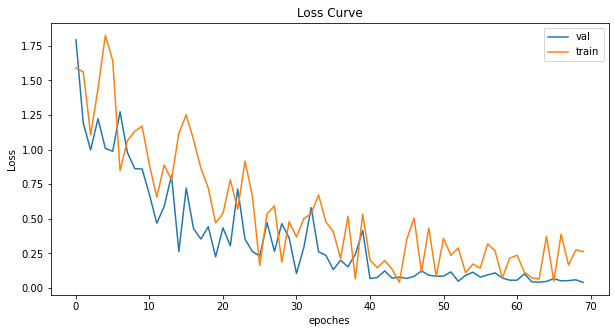

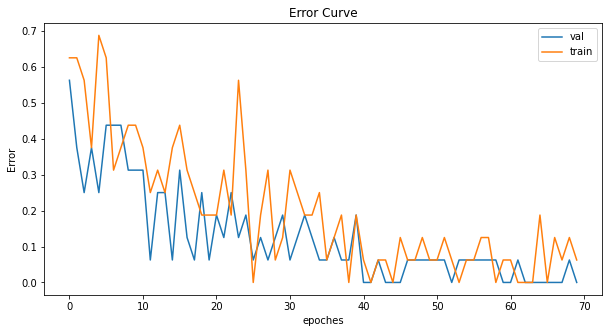

CNN(
  (features): Sequential(
    (0): ConvUnit(
      (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): ConvUnit(
      (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): ConvUnit(
      (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): Dropout(p=0.5, inplace=True)
    (4): ConvUnit(
      (0): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (5): ConvUnit(
      (0): Conv2

In [ ]:
train(model=cnn_model, loss='ce', optimizer='adam', scheduler="steplr", epochs=70, device=device, dataset='cifar10', lossfn=None, train_loader=cifar10_train,
      val_loader=cifar10_val, weight_decay=0.0, lr=0.001, momentum=0, patience=10, step_size=40, gamma=0.1, min_delta=-1.0)

In [ ]:
_ = test(model=cnn_model, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar10', test_loader=cifar10_test, at_epoch=70)

Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
[70] test metrics:{"loss": 0.9241928458213806, "error": 0.375}
FINISHED TESTING


In [ ]:
from google.colab import files
files.download('./checkpoints/CNN_70.pth.tar') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##DNN & MNIST

In [ ]:
dnn = {"input_size": 1024, "hidden_size":64, "num_classes":10,"num_layer": 10, "activation": nn.ReLU()}
model = get_model("mlp", **dnn)
print(model.__class__.__name__)

MLP


In [ ]:
mnist_train, mnist_val, mnist_test = get_dataset("mnist", batch_size=32, cuda=0,
                  train_size=10000, val_size=2000, test_size=1000,
                  test_batch_size=32)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/train-images-idx3-ubyte.gz to /root/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/MNIST/raw

Dataset sizes: 	 train: 10000 	 val: 2000 	 test: 1000
Batch size: 	 32


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 2.148266077041626, "error": 0.75}
[0] test metrics:{"loss": 2.0747854709625244, "error": 0.8125}
Epoch number: 0 
Epoch Time: 4.81 sec
[1] train metrics:{"loss": 1.8856921195983887, "error": 0.6875}
[1] test metrics:{"loss": 1.8562040328979492, "error": 0.5625}
Epoch number: 1 
Epoch Time: 4.87 sec
[2] train metrics:{"loss": 1.646814227104187, "error": 0.625}
[2] test metrics:{"loss": 1.5591270923614502, "error": 0.625}
Epoch number: 2 
Epoch Time: 4.77 sec
[3] train metrics:{"loss": 1.1507318019866943, "error": 0.375}
[3] test metrics:{"loss": 1.300313949584961, "error": 0.5}
Epoch number: 3 
Epoch Time: 4.76 sec
[4] train metrics:{"loss": 0.9708276987075806, "error": 0.3125}
[4] test metrics:{"loss": 1.3332128524780273, "error": 0.625}
Epoch number: 4 
Epoch Time: 4.77 sec
[5] train metrics:{"loss": 1.241341471672058, "error": 0.5}
[5] test metrics:{"loss": 1.2110008001327515, "e

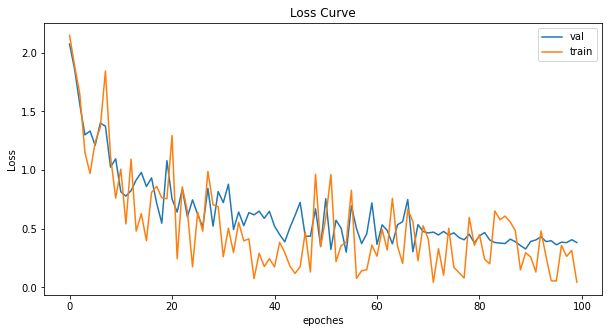

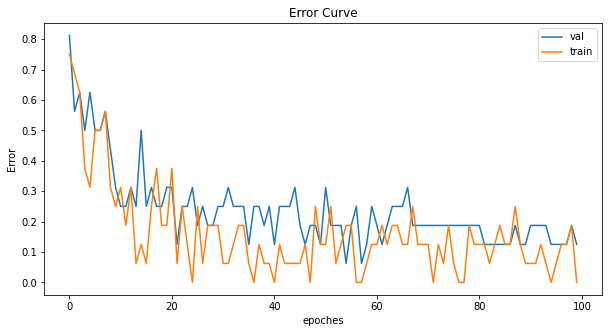

In [ ]:
saved = train(model=model, loss='ce', optimizer='sgd', scheduler=True, epochs=100, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train,
      val_loader=mnist_val, weight_decay=0, lr=0.001, momentum=0.7, patience=5, step_size=70, gamma=0.1, min_delta=-0.6)

In [ ]:
_ = test(model=saved, loss='ce', optimizer='sgd', device=device, lossfn=None, dataset='mnist', test_loader=mnist_test, at_epoch=None)

Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.1109983921051025
Error:  0.25
FINISHED TESTING


MLP(
  (activation): ReLU()
  (layers): Sequential(
    (0): Layer(in_features=1024, out_features=64, bias=True, beta=0.31622776601683794)
    (1): ReLU()
    (2): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (3): ReLU()
    (4): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (5): ReLU()
    (6): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (7): ReLU()
    (8): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (9): ReLU()
    (10): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (11): ReLU()
    (12): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (13): ReLU()
    (14): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (15): ReLU()
    (16): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (17): ReLU()
    (18): Layer(in_features=6

In [ ]:
from google.colab import files
files.download('./checkpoints/MLP_100.pth.tar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##RESNET & CIFAR100

In [ ]:
fashion_train, fashion_val, fashion_test =get_dataset("fashion-mnist", batch_size=16, cuda=0,
                  train_size=10000, val_size=1000, test_size=500,
                  test_batch_size=10)

Dataset sizes: 	 train: 10000 	 val: 1000 	 test: 500
Batch size: 	 16


In [ ]:
cifar100_train, cifar100_val, cifar100_test = get_dataset("cifar100", batch_size=32, cuda=0,
                  train_size=20000, val_size=2000, test_size=1000,
                  test_batch_size=10)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting /root/data/cifar-100-python.tar.gz to /root/data
Dataset sizes: 	 train: 20000 	 val: 2000 	 test: 1000
Batch size: 	 32


In [ ]:
resnet18 = {"filters_percentage": 0.4, "n_channels":3,"num_classes": 100, "block": ResBlock, "num_blocks": [2,2,2,2]}
model = get_model("resnet18", **resnet18)
print(model.__class__.__name__)

ResNet18


Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 4.512668609619141, "error": 0.96875}
[0] test metrics:{"loss": 4.066493034362793, "error": 0.9375}
Epoch number: 0 
Epoch Time: 12.98 sec
[1] train metrics:{"loss": 4.060430526733398, "error": 0.90625}
[1] test metrics:{"loss": 3.912081241607666, "error": 0.9375}
Epoch number: 1 
Epoch Time: 12.96 sec
[2] train metrics:{"loss": 3.7611865997314453, "error": 0.875}
[2] test metrics:{"loss": 3.753871440887451, "error": 0.875}
Epoch number: 2 
Epoch Time: 12.93 sec
[3] train metrics:{"loss": 3.734158754348755, "error": 0.90625}
[3] test metrics:{"loss": 3.460813045501709, "error": 0.8125}
Epoch number: 3 
Epoch Time: 13.06 sec
[4] train metrics:{"loss": 3.701526165008545, "error": 0.9375}
[4] test metrics:{"loss": 3.588839054107666, "error": 0.8125}
Epoch number: 4 
Epoch Time: 13.12 sec
[5] train metrics:{"loss": 3.6665847301483154, "error": 0.9375}
[5] test metrics:{"loss": 3.29

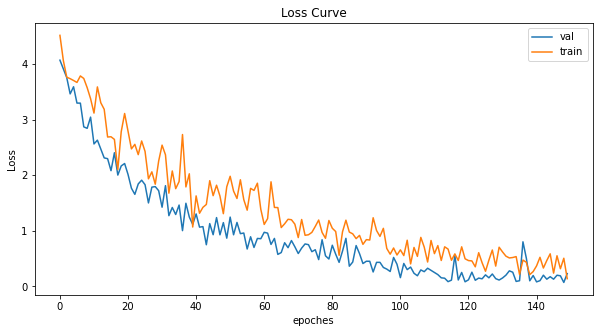

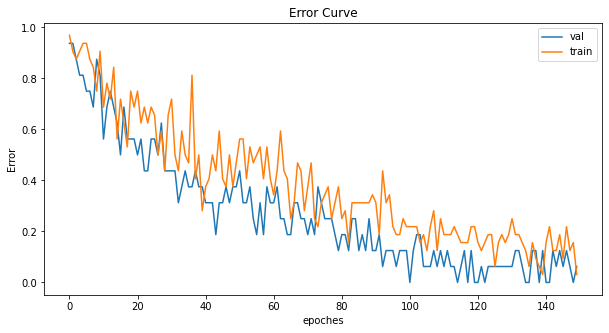

ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): ResBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(25, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (shortcut): Sequential(
        (0): Conv2d(64, 25, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
    )
    (1): ResBlock(
      (bn1): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(25, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_r

In [ ]:
train(model=model, loss='ce', optimizer='sgd', scheduler=None, epochs=150, device=device, dataset='cifar100', lossfn=None, train_loader=cifar100_train,
      val_loader=cifar100_val, weight_decay=0, lr=0.001, momentum=0.7, patience=5, step_size=130, gamma=0.1, min_delta=-0.6)

In [ ]:
_ = test(model=model, loss='ce', optimizer='sgd', device=device, lossfn=None, dataset='cifar100', test_loader=cifar100_test, at_epoch=200)

Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
TESTING
[200] test metrics:{"loss": 3.2400870323181152, "error": 0.5}
FINISHED TESTING


ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): ResBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(25, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (shortcut): Sequential(
        (0): Conv2d(64, 25, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
    )
    (1): ResBlock(
      (bn1): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(25, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_r

In [ ]:
! ls ./checkpoints/
from google.colab import files
files.download('./checkpoints/ResNet18_200.pth.tar')

ResNet18_200.pth.tar  ResNet18_70.pth.tar


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##LR & CSV

In [ ]:
traind, val, testd = get_dataset("csv", path='/content/drive/My Drive/project/URP/data/csv_datasets/winequality-red.csv')

In [ ]:
regression = LinearRegression(input_size=11, output_size=1)

In [ ]:
dnn = {"input_size": 11, "hidden_size":64, "num_classes":1,"num_layer": 10, "activation": nn.ReLU()}
mlp = get_model("mlp", **dnn)
print(mlp.__class__.__name__)

MLP


Optimizer: 	  adam

Loss function:
L1Loss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.5267432928085327, "error": 0.9333333298563957}
[0] test metrics:{"loss": 1.0848498344421387, "error": 0.9375}
Epoch number: 0 
Epoch Time: 0.62 sec
[1] train metrics:{"loss": 0.872506320476532, "error": 1.0}
[1] test metrics:{"loss": 1.0208959579467773, "error": 0.9375}
Epoch number: 1 
Epoch Time: 0.6 sec
[2] train metrics:{"loss": 0.782767117023468, "error": 0.8666666597127914}
[2] test metrics:{"loss": 0.7602530121803284, "error": 0.9375}
Epoch number: 2 
Epoch Time: 0.61 sec
[3] train metrics:{"loss": 0.5623997449874878, "error": 1.0}
[3] test metrics:{"loss": 0.7365806698799133, "error": 0.9375}
Epoch number: 3 
Epoch Time: 0.6 sec
[4] train metrics:{"loss": 0.35855603218078613, "error": 1.0}
[4] test metrics:{"loss": 0.7571700811386108, "error": 0.9375}
Epoch number: 4 
Epoch Time: 0.63 sec
[5] train metrics:{"loss": 0.5308729410171509, "error": 1.0}
[5] test metrics:{"loss": 0.7333

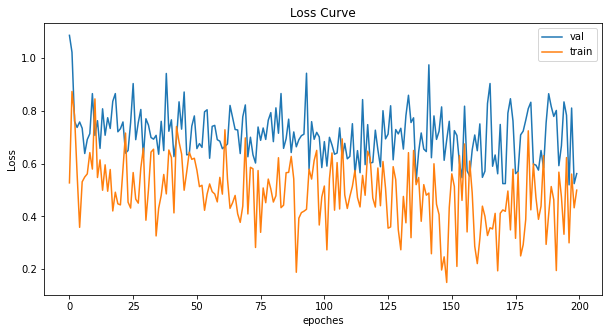

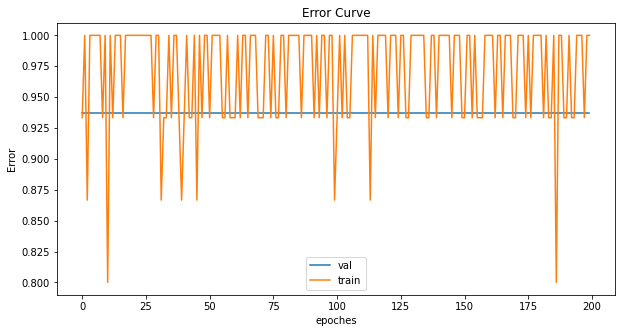

MLP(
  (activation): ReLU()
  (layers): Sequential(
    (0): Layer(in_features=11, out_features=64, bias=True, beta=0.31622776601683794)
    (1): ReLU()
    (2): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (3): ReLU()
    (4): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (5): ReLU()
    (6): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (7): ReLU()
    (8): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (9): ReLU()
    (10): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (11): ReLU()
    (12): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (13): ReLU()
    (14): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (15): ReLU()
    (16): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (17): ReLU()
    (18): Layer(in_features=64,

In [ ]:
train(model=mlp, loss='mae', optimizer='adam', scheduler=None, epochs=200, device=device, dataset='mnist', lossfn=None, train_loader=traind, val_loader=testd, weight_decay=0.0, lr=0.001, momentum=0, min_delta=-1, name='csv')

In [ ]:
from google.colab import files
!ls ./checkpoints/
files.download('./checkpoints/LinearRegression_100.pth.tar')

LinearRegression_100.pth.tar  LinearRegression_40.pth.tar
LinearRegression_10.pth.tar   LinearRegression_48.pth.tar
LinearRegression_12.pth.tar   LinearRegression_9.pth.tar


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>